In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
file_path = "data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()

# Display basic statistics
df_describe = df.describe()

df_info, df_head, missing_values, df_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


(None,
    beds  baths    size size_units  lot_size lot_size_units  zip_code  \
 0     3    2.5  2590.0       sqft   6000.00           sqft     98144   
 1     4    2.0  2240.0       sqft      0.31           acre     98106   
 2     4    3.0  2040.0       sqft   3783.00           sqft     98107   
 3     4    3.0  3800.0       sqft   5175.00           sqft     98199   
 4     2    2.0  1042.0       sqft       NaN            NaN     98102   
 
        price  
 0   795000.0  
 1   915000.0  
 2   950000.0  
 3  1950000.0  
 4   950000.0  ,
 beds                0
 baths               0
 size                0
 size_units          0
 lot_size          347
 lot_size_units    347
 zip_code            0
 price               0
 dtype: int64,
               beds        baths          size     lot_size      zip_code  \
 count  2016.000000  2016.000000   2016.000000  1669.000000   2016.000000   
 mean      2.857639     2.159970   1735.740575  3871.059694  98123.638889   
 std       1.255092     1.

In [48]:
df_cleaned = df.dropna()

# Verify that missing values are removed
missing_values_after = df_cleaned.isnull().sum()

In [49]:
# Define conversion factors
unit_conversion = {
    'sqft': 1,  # Square feet as base unit
    'acre': 43560  # 1 acre = 43,560 sqft
}

# Apply conversion to 'size' based on 'size_units'
df_cleaned['size'] = df_cleaned.apply(lambda row: row['size'] * unit_conversion.get(row['size_units'], 1), axis=1)

# Apply conversion to 'lot_size' based on 'lot_size_units'
df_cleaned['lot_size'] = df_cleaned.apply(lambda row: row['lot_size'] * unit_conversion.get(row['lot_size_units'], 1), axis=1)

# Drop the original unit columns as they are no longer needed
df_cleaned = df_cleaned.drop(columns=['size_units', 'lot_size_units'])



<ipython-input-49-29e236d4ef18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['size'] = df_cleaned.apply(lambda row: row['size'] * unit_conversion.get(row['size_units'], 1), axis=1)
<ipython-input-49-29e236d4ef18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['lot_size'] = df_cleaned.apply(lambda row: row['lot_size'] * unit_conversion.get(row['lot_size_units'], 1), axis=1)


In [50]:
df_cleaned

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
5,2,2.0,1190.0,43560.0,98107,740000.0
...,...,...,...,...,...,...
2009,3,3.5,1680.0,1486.0,98126,675000.0
2010,2,2.0,1400.0,14810.4,98199,699950.0
2011,3,2.0,1370.0,21780.0,98112,910000.0
2013,4,2.0,2140.0,6250.0,98199,1150000.0


In [51]:

X = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, -1].values

In [52]:
X

array([[3.00000e+00, 2.50000e+00, 2.59000e+03, 6.00000e+03, 9.81440e+04],
       [4.00000e+00, 2.00000e+00, 2.24000e+03, 1.35036e+04, 9.81060e+04],
       [4.00000e+00, 3.00000e+00, 2.04000e+03, 3.78300e+03, 9.81070e+04],
       ...,
       [3.00000e+00, 2.00000e+00, 1.37000e+03, 2.17800e+04, 9.81120e+04],
       [4.00000e+00, 2.00000e+00, 2.14000e+03, 6.25000e+03, 9.81990e+04],
       [3.00000e+00, 2.00000e+00, 1.71000e+03, 4.26700e+03, 9.81330e+04]])

In [53]:
y

array([ 795000.,  915000.,  950000., ...,  910000., 1150000.,  659000.])

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
print(y_train)

[ 615000.  990200. 2458000. ...  699900.  875000.  850000.]


In [57]:
print(X_train)

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 2.50000e+00 1.01000e+03
  5.70000e+02]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.13000e+03
  4.85000e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 3.00000e+00 1.82400e+03
  1.61172e+04]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.50000e+00 1.60000e+03
  6.95000e+02]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.50000e+00 2.60000e+03
  9.10000e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 9.95000e+02
  5.00000e+03]]


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
print(y_train)

[ 615000.  990200. 2458000. ...  699900.  875000.  850000.]


In [60]:
print(X_train)

[[-4.74578998e-02 -1.35302018e-01 -3.12828774e-01 ...  2.33920129e-01
  -9.79047985e-01 -6.21889347e-02]
 [-4.74578998e-02 -1.35302018e-01 -3.12828774e-01 ... -2.68143170e-01
   2.88015407e-01 -4.88792566e-02]
 [ 2.10713075e+01 -1.35302018e-01 -3.12828774e-01 ...  7.35983427e-01
  -5.81644128e-02 -1.38412182e-02]
 ...
 [-4.74578998e-02 -1.35302018e-01 -3.12828774e-01 ...  2.33920129e-01
  -3.11577091e-01 -6.18002174e-02]
 [-4.74578998e-02 -1.35302018e-01 -3.12828774e-01 ...  2.33920129e-01
   8.19729509e-01 -3.56628707e-02]
 [-4.74578998e-02 -1.35302018e-01 -3.12828774e-01 ... -2.68143170e-01
  -9.96017584e-01 -4.84127959e-02]]


Polynomial Degree: 1
R² Score: 0.4815
Mean Squared Error: 189247563581.05


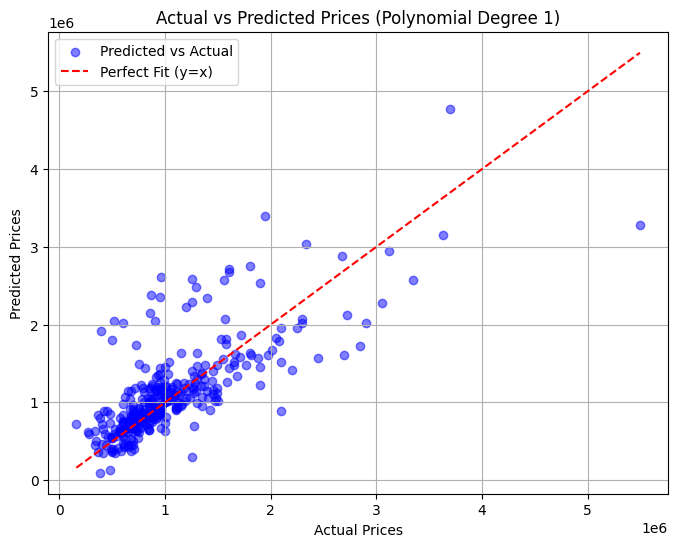

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
degree = 1  # Change this to try different degrees

# Generate polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = model.predict(X_test_poly)

# Evaluate model
r2 = r2_score(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)

# Print results
print(f"Polynomial Degree: {degree}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit (y=x)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices (Polynomial Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()
